<a href="https://colab.research.google.com/github/joaoflavio30/olx-demo-eda-spotify/blob/main/spotify_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importando Libs**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Importando e entendendo os dados**




In [ ]:
df = pd.read_excel('Spotify_data.xlsx')

In [ ]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       520 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

##**Tratando Dados**

In [ ]:
df.isnull().sum()

Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

**Sem valores nulos**

# **Análise Exploratória de Dados**

### **Como a idade dos usuários se distribui no Spotify**

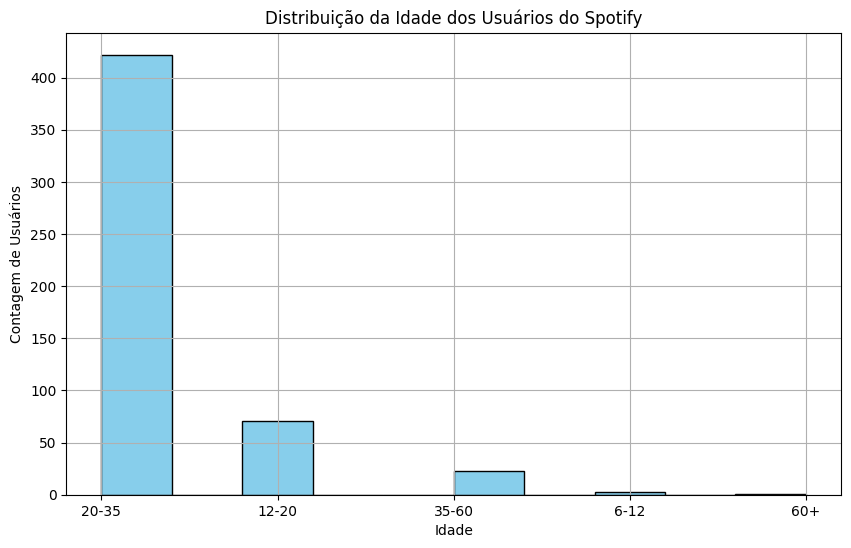

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribuição da Idade dos Usuários do Spotify')
plt.xlabel('Idade')
plt.ylabel('Contagem de Usuários')
plt.grid(True)
plt.show()

[Text(0.5, 1.0, 'Distribuição de idade de acordo com o período de uso do Spotify')]

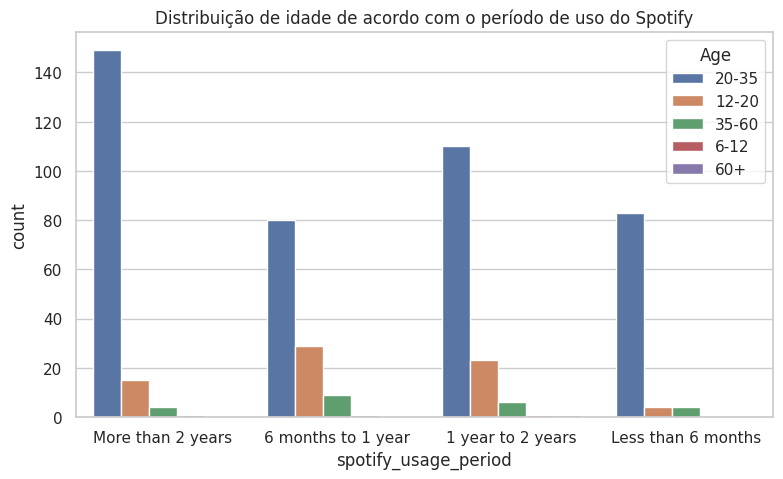

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.countplot(x='spotify_usage_period',data=df,hue='Age').set(title="Distribuição de idade de acordo com o período de uso do Spotify")

### **Qual é a distribuição de gênero dos usuários?**

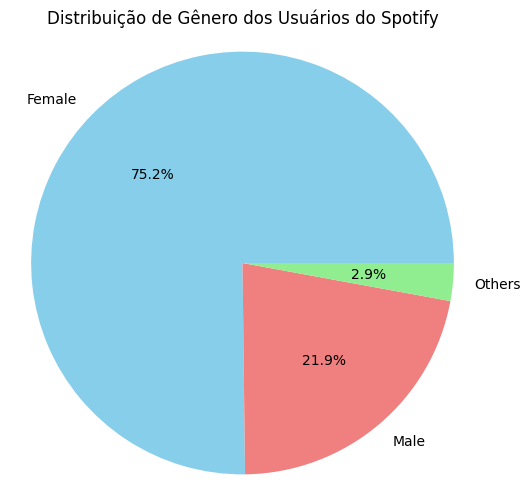

In [ ]:
# Contar o número de ocorrências de cada gênero
gender_counts = df['Gender'].value_counts()

# Plotar o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribuição de Gênero dos Usuários do Spotify')
plt.axis('equal')  # Garante que o gráfico de pizza seja circular
plt.show()

### **Quanto tempo os usuários têm usado o Spotify?**

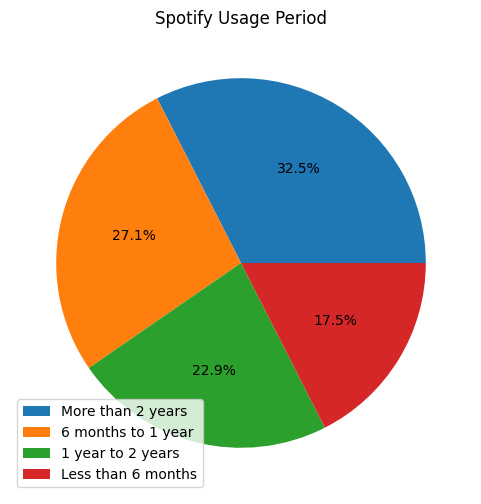

In [ ]:
labels = ['More than 2 years', '6 months to 1 year', '1 year to 2 years','Less than 6 months']
x = df['spotify_usage_period'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(x,autopct='%1.1f%%')
plt.title('Spotify Usage Period')
plt.legend(labels, loc='best')
plt.show()

### **Qual é o plano de assinatura mais comum entre os usuários?**


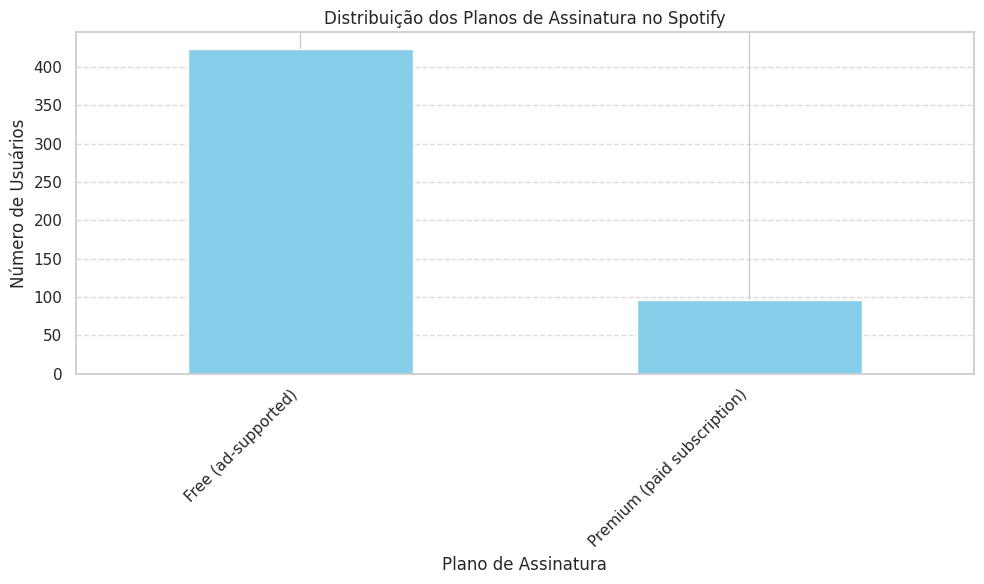

In [ ]:
# Contar o número de ocorrências de cada plano de assinatura
subscription_counts = df['spotify_subscription_plan'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
subscription_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição dos Planos de Assinatura no Spotify')
plt.xlabel('Plano de Assinatura')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

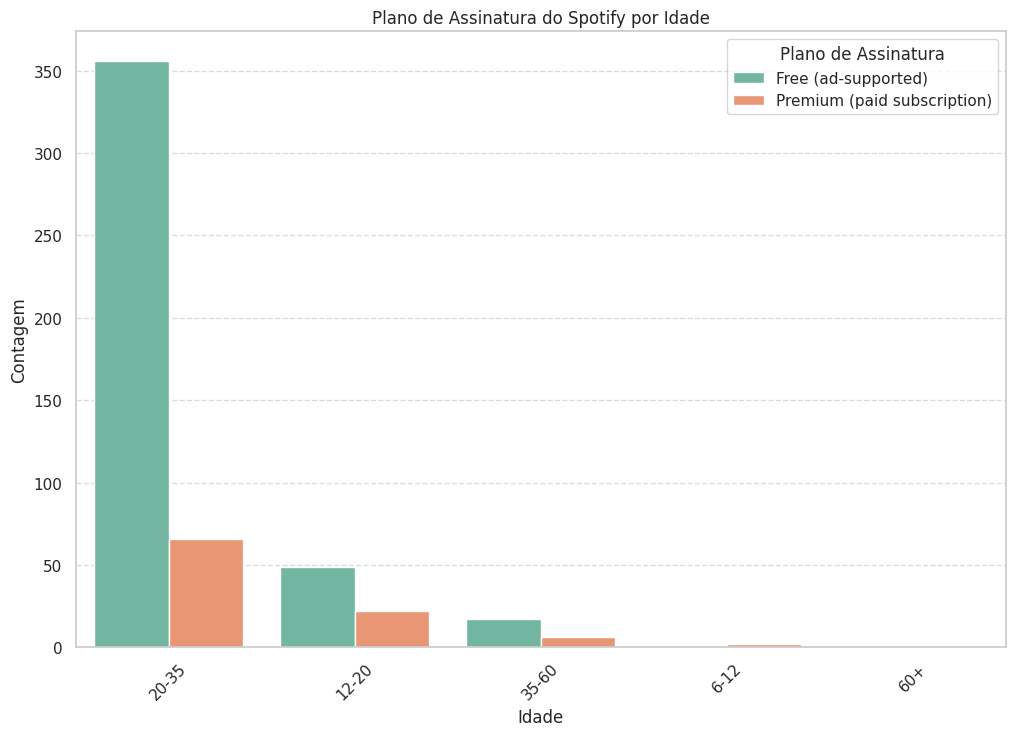

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Age', hue='spotify_subscription_plan', palette='Set2')
plt.title('Plano de Assinatura do Spotify por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Plano de Assinatura', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()

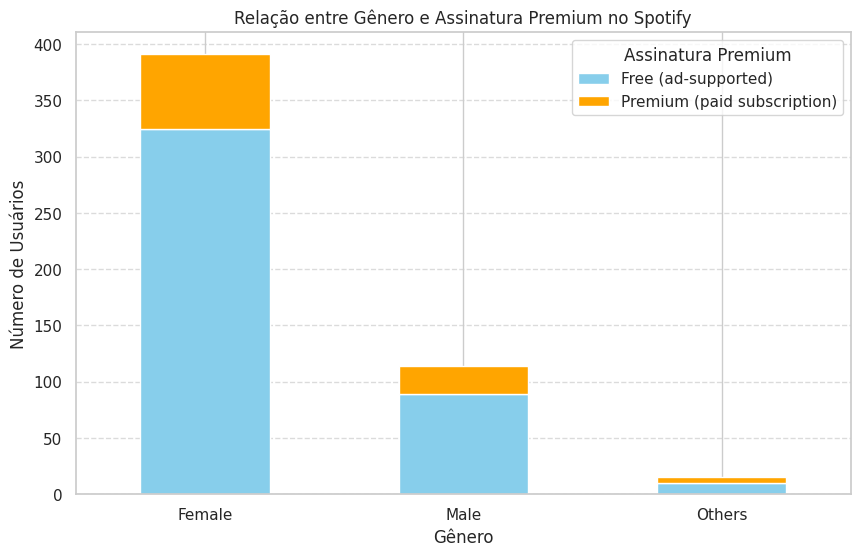

In [ ]:
pivot_table = df.pivot_table(index='Gender', columns='spotify_subscription_plan', aggfunc='size')

# Plotar o gráfico de barras empilhadas
pivot_table.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(10, 6))
plt.title('Relação entre Gênero e Assinatura Premium no Spotify')
plt.xlabel('Gênero')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=0)
plt.legend(title='Assinatura Premium')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Filtrar os usuários com assinatura premium
premium_count = df['spotify_subscription_plan'].value_counts()['Premium (paid subscription)']
print((premium_count/len(df))*100)
print("Número de usuários premium:", premium_count)

18.461538461538463
Número de usuários premium: 96


#####**Após calcular a taxa de retenção de assinantes premium de 18%, confirmamos que as métricas de spotify_subscription_plan e quantidade de registros são uma métrica significativo para o Key Result de aumentar a taxa de retenção de assinantes premium(por isso consideradas Kpi's). Essa métricas, juntamente com outras métricas relevantes, compõe nossos principais indicadores de desempenho (KPIs), ajudando-nos a monitorar, visualizando onde estamos na trilha de Resultados Chave, e alcançando nossos objetivos do OKR. A qual no caso é aumentar a taxa de Retenção de assinantes Premium**

### **Qual é a satisfação dos usuários em relação à variedade de podcasts no Spotify?**

In [ ]:
# Mapear as respostas para categorias de NPS
categorias = {
    'Ok': 'ok',
    'Satisfied': 'satisfeito',
    'Very Satisfied': 'muito satisfeito',
    'Dissatisfied': 'insatisfeito',
    'Very Dissatisfied': 'muito insatisfeito'
}

# Mapear as respostas para as categorias de NPS e criar uma nova coluna com os resultados
df['nps_category'] = df['pod_variety_satisfaction'].map(categorias)

# Contar o número de respostas em cada categoria
contador = df['nps_category'].value_counts()

# Calcular o NPS
promotores = contador['satisfeito'] + contador['muito satisfeito']
detratores = contador['insatisfeito'] + contador['muito insatisfeito']
nps = (promotores - detratores) / len(df) * 100

print("NPS:", nps)
print(contador)

NPS: 34.61538461538461
ok                    280
satisfeito            162
muito satisfeito       48
insatisfeito           20
muito insatisfeito     10
Name: nps_category, dtype: int64


######**Aqui, Podemos ver que a Métrica da coluna "pod_variety_satisfaction" acaba virando Um Kpi por se tratar de uma métrica crucial para entendermos onde estamos em relação ao nosso objetivo determinado da Metodologia OKR, com essa métrica podemos ver como estamos indo e para onde queremos ir no desdobramento de resultados chave para chegar ao objetivo determinado, que no caso é melhorar a experiência do usuário com um Resultado Chave de ir de um valor de NPS X para um valor Y.**